In [182]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [183]:
file_path = "result/TSMC.json"
tsmc = pd.read_json(file_path)

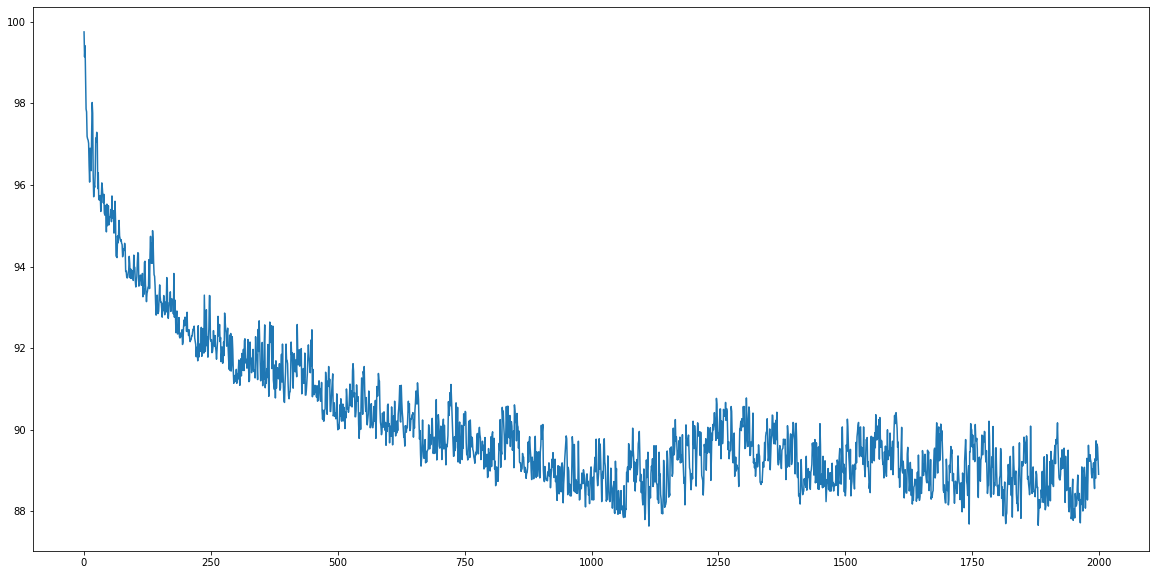

In [184]:
tsmc['average'].plot(figsize = (20, 10))

In [185]:
file_path = "result/agent.json"
agent = pd.read_json(file_path)

In [186]:
agent.columns

Index(['zi_1_CASH', 'zi_1_TSMC', 'zi_1_WEALTH', 'tr_1_CASH', 'tr_1_TSMC',
       'tr_1_WEALTH', 'mr_1_CASH', 'mr_1_TSMC', 'mr_1_WEALTH'],
      dtype='object')

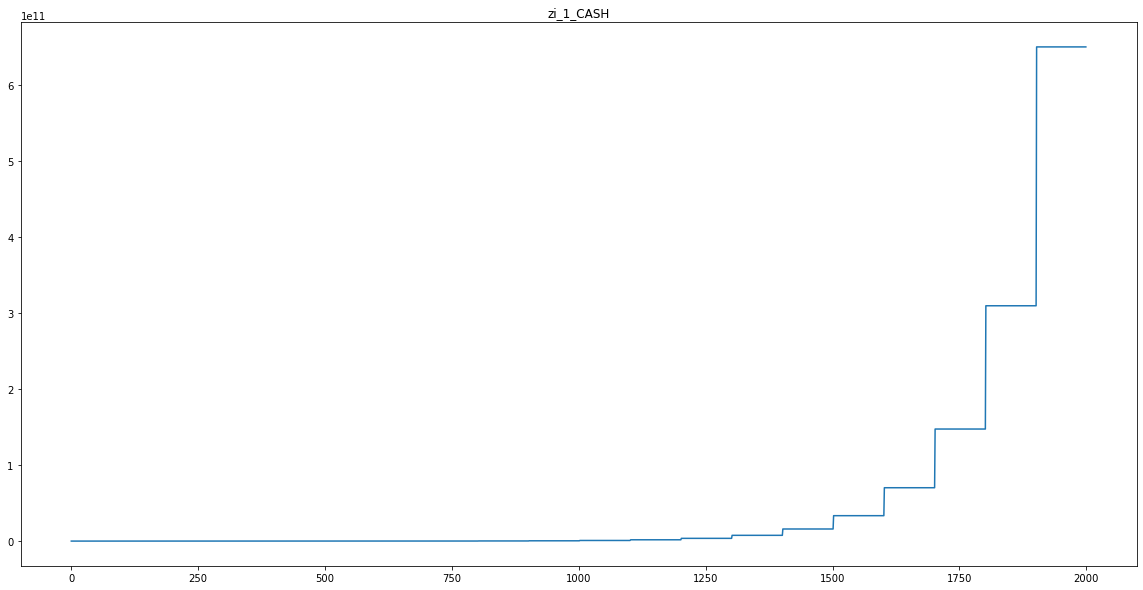

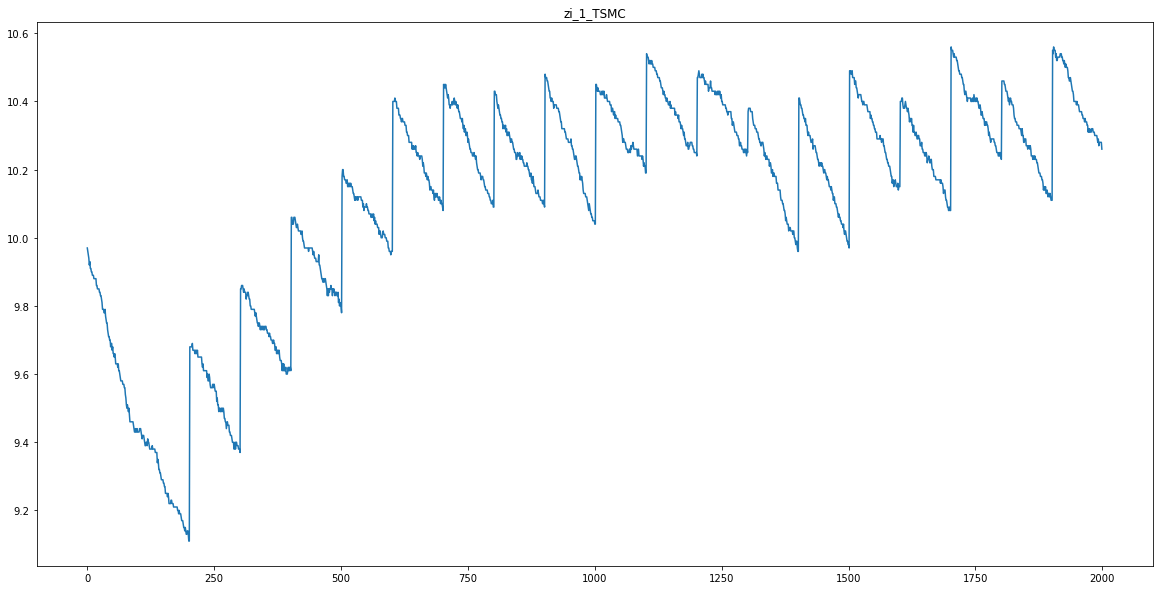

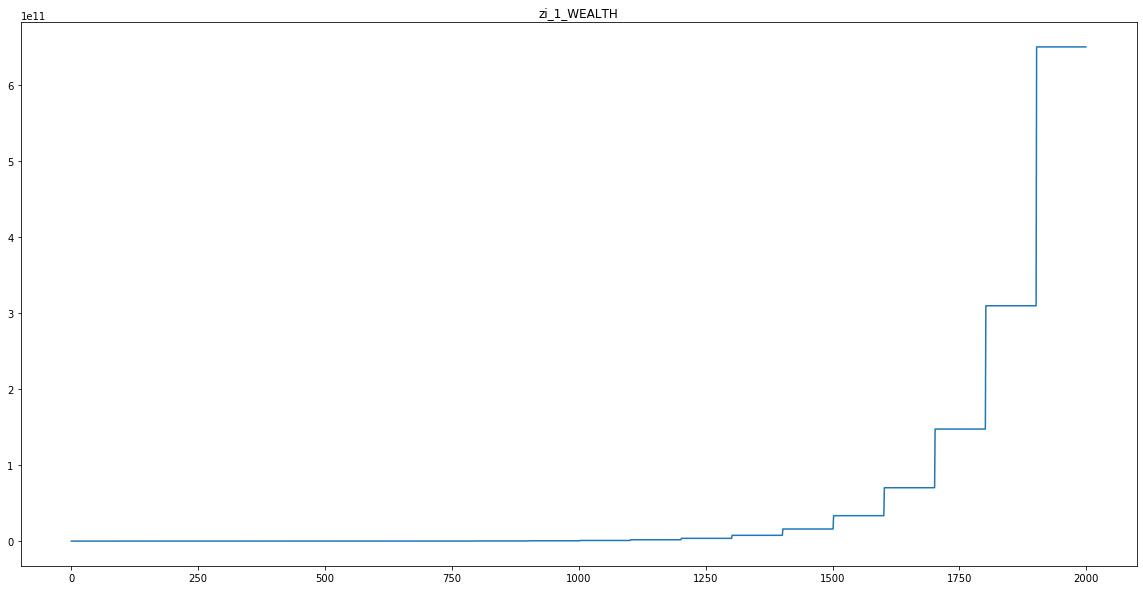

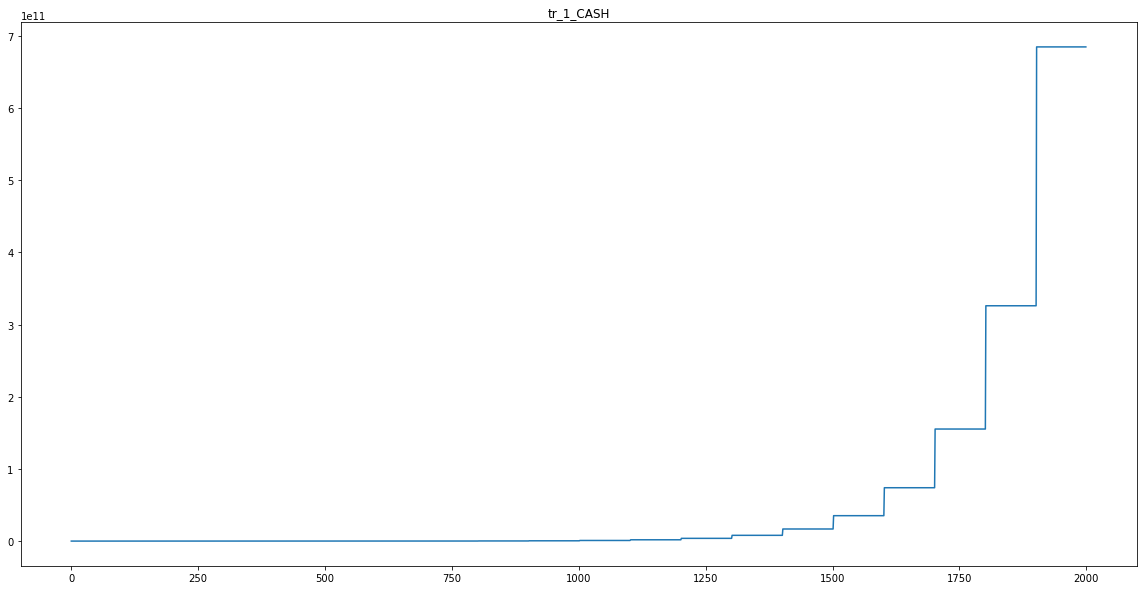

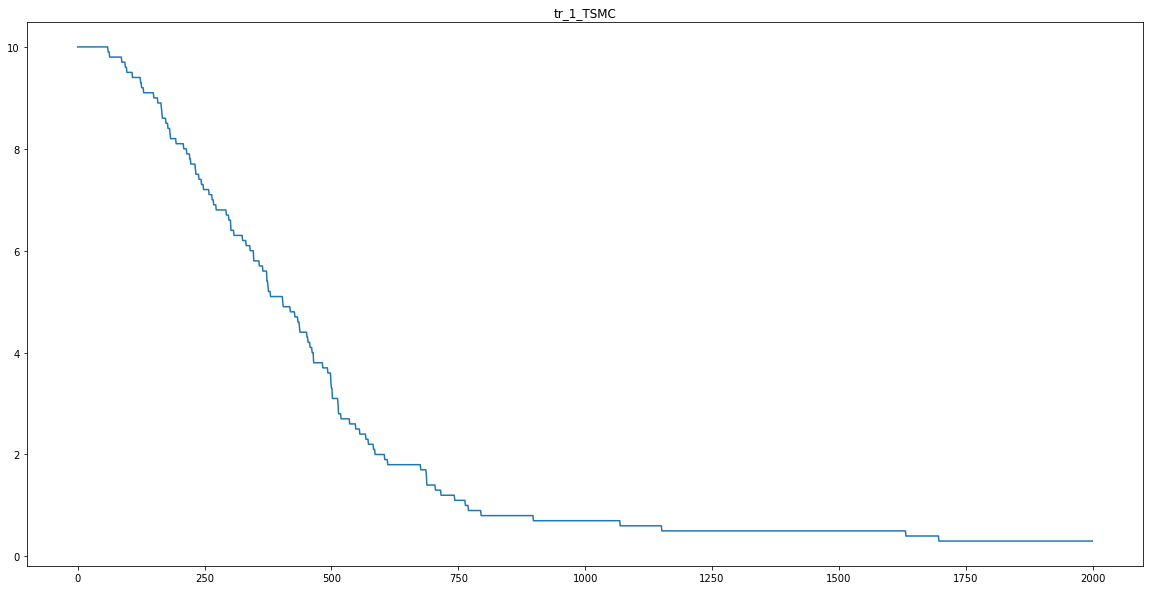

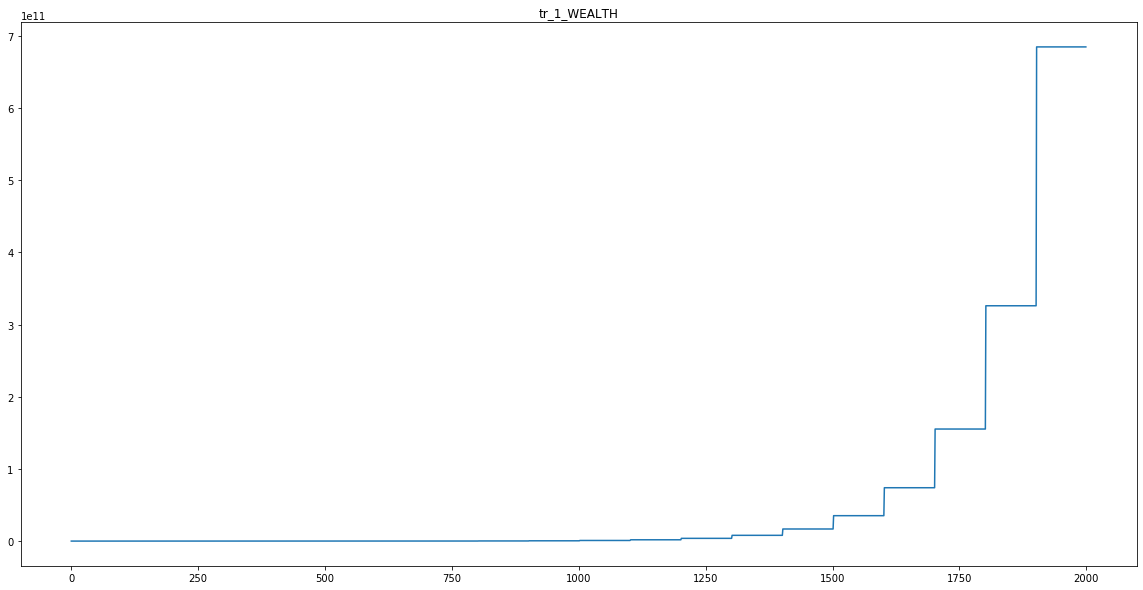

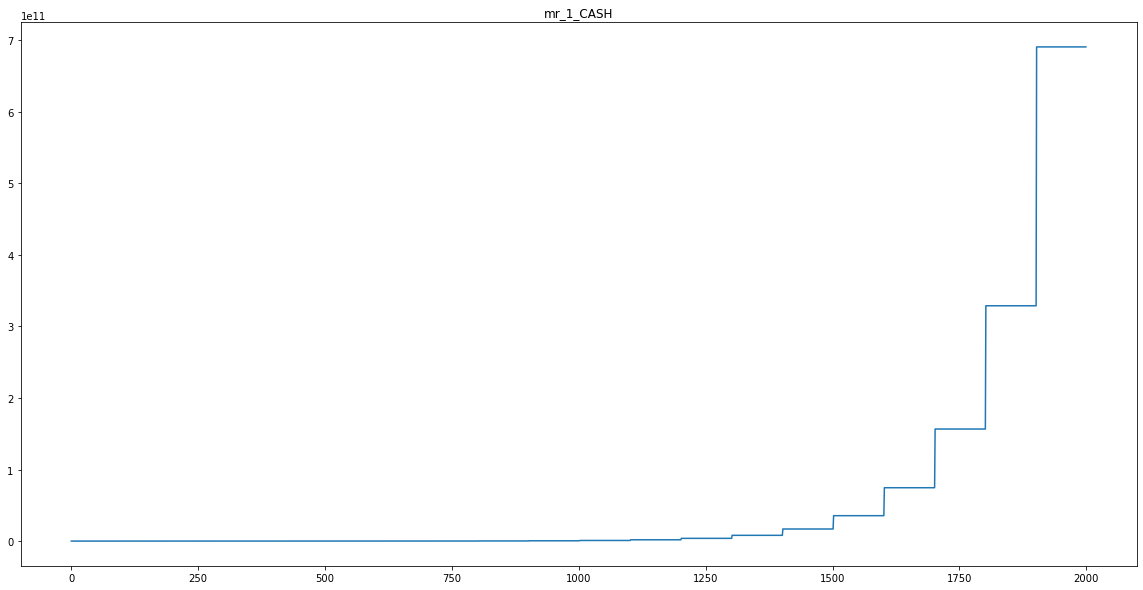

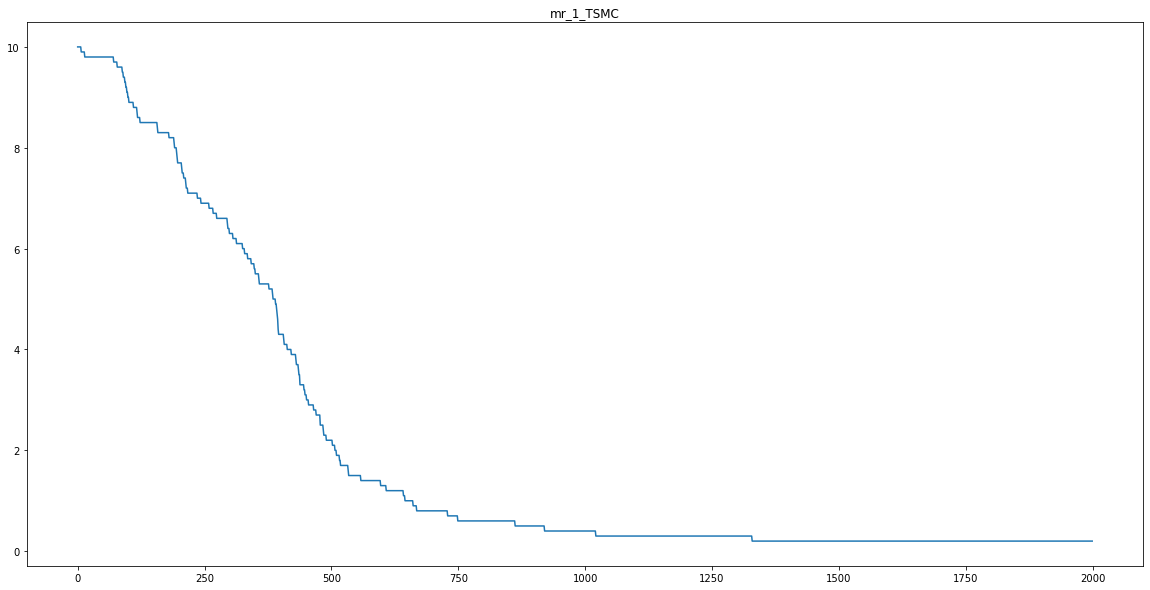

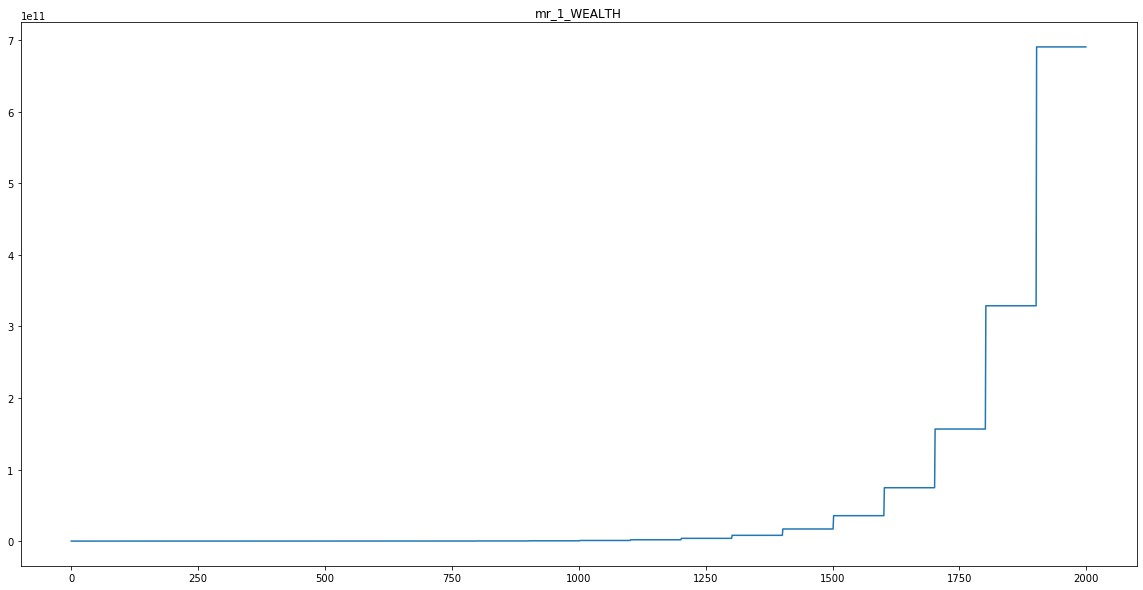

In [187]:
# for agent_type in agent.columns:
for i in range(len(agent.columns)):
    plt.figure(figsize=(20, 10))
    plt.plot(agent.iloc[:, i])
    plt.title(agent.columns[i])
    plt.show()